In [1]:
import pandas as pd
file_path='data.csv'
df = pd.read_csv(file_path)


In [2]:
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  texture_worst  perimeter_worst  

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [4]:
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])


In [5]:
df_cleaned['diagnosis'] = LabelEncoder().fit_transform(df_cleaned['diagnosis'])


In [6]:
X = df_cleaned.drop(columns='diagnosis')
y = df_cleaned['diagnosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train[:5].values

(array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
          0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
         -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
          3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
         -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
          1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
        [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
          3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
          0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
          1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
          2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
          3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
        [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
         -0.30735463, -0.36555756, -

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve


In [10]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [11]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1
y_pred = model.predict(X_test_scaled)

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

conf_matrix, precision, recall, roc_auc

(array([[70,  1],
        [ 2, 41]], dtype=int64),
 0.9761904761904762,
 0.9534883720930233,
 0.99737962659679)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


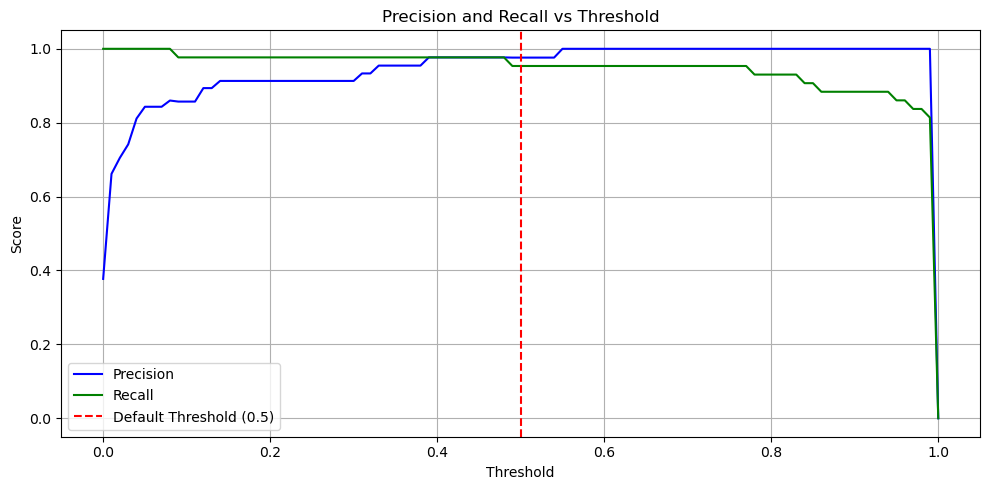

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate thresholds and corresponding precision-recall values
thresholds = np.arange(0.0, 1.01, 0.01)
precisions = []
recalls = []

for t in thresholds:
    preds = (y_probs >= t).astype(int)
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))

# Plot precision-recall vs. threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
